#Mounting Google drive

accessing google drive / authendication

In [138]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


# **Import Libraries and modules**

In [0]:
# https://keras.io/
!pip install -q keras                                                                                        
import keras

In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Add
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils

from keras.datasets import mnist

### Load pre-shuffled MNIST data into train and test sets

In [0]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

(60000, 28, 28)


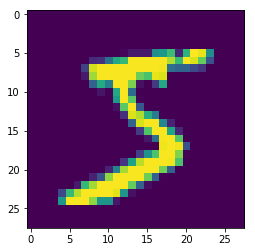

In [142]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

##Reshaping the x_train and x_test

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

##Normalizing /Scaling

Dividing by 255 , (highest value  the pixel )

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [145]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

##Convert 1-dimensional class arrays to 10-dimensional class matrices

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [147]:
Y_train[:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

##Buiding a sequential model

In [192]:
# from keras.layers import Activation
# model = Sequential()

 
# model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(28,28,1)))
# model.add(Convolution2D(10, 1, activation='relu'))
# model.add(Convolution2D(32, 3, 3, activation='relu'))
# model.add(Convolution2D(10, 1, activation='relu'))
# model.add(maxpooling)
# model.add(Convolution2D(10, 26))
# model.add(Flatten())
# model.add(Activation('softmax'))

from keras.layers import Activation
from keras.layers import MaxPooling2D
model = Sequential()

model.add(Convolution2D(16,3,3,activation='relu', input_shape=(28,28,1)))
# channels = 16 , kernel_size = (3,3) , receptive field = 3 ,giving input of size = 28x28,output_size = 26x26

model.add(Convolution2D(10, 1, activation='relu'))                     
# channels = 10 , kernel_size = (1,1) , receptive field = 3 ,output_size = 26x26

model.add(Convolution2D(32,3,3,activation='relu'))
# channels = 32 , kernel_size = (3,3) , receptive field = 5 ,output_size = 24x24

model.add(Convolution2D(10, 1, activation='relu'))
# channels = 10 , kernel_size = (1,1) , receptive field = 5 ,output_size = 24x24

model.add(MaxPooling2D(pool_size=(2, 2), strides=None, padding='valid', data_format=None))
# Max_pooling =>  out_channels = 10 , kernel_size = (2,2) , receptive field = 10 ,output_size = 12x12 

model.add(Convolution2D(16,3,3,activation='relu'))
# out_channels = 16 , kernel_size = (3,3) , receptive field = 12 ,output_size = 10x10

model.add(Convolution2D(10, 1, activation='relu'))
# out_channels = 10 , kernel_size = (1,1) , receptive field = 12 ,output_size = 10x10

model.add(Dropout((0.1)))
#Dropping out 10% of pixels in the output channels

model.add(Convolution2D(32,3,3,activation='relu'))
# out_channels = 32 , kernel_size = (3,3) , receptive field = 14 ,output_size = 8x8

model.add(Convolution2D(10, 1, activation='relu'))
# out_channels = 10 , kernel_size = (1,1) , receptive field = 14 ,output_size = 8x8

model.add(Dropout((0.2)))
#Dropping out 20% of pixels in the output channels

model.add(Convolution2D(64,3,3,activation='relu'))
# out_channels = 64 , kernel_size = (3,3) , receptive field = 16 ,output_size = 6x6

model.add(Convolution2D(10, 1, activation='relu'))
# out_channels = 10 , kernel_size = (1,1) , receptive field = 16 ,output_size = 6x6

model.add(Dropout((0.3)))
#Dropping out 20% of pixels in the output channels

model.add(Convolution2D(10,6))
# out_channels = 10 , kernel_size = (6,6) , receptive field = 28 ,output_size = 1x1

model.add(Dropout((0.1)))
#Dropping out 10% of pixels in the output channels

model.add(Flatten()) 
#Flattens the output pixels (1-D array)


model.add(Activation('softmax'))
# Softmax  to give a better convincing output

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(16, (3, 3), activation="relu")`
  if sys.path[0] == '':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:15: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu")`
  from ipykernel import kernelapp as app
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:18: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`


In [210]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_378 (Conv2D)          (None, 26, 26, 16)        160       
_________________________________________________________________
conv2d_379 (Conv2D)          (None, 26, 26, 10)        170       
_________________________________________________________________
conv2d_380 (Conv2D)          (None, 24, 24, 32)        2912      
_________________________________________________________________
conv2d_381 (Conv2D)          (None, 24, 24, 10)        330       
_________________________________________________________________
max_pooling2d_39 (MaxPooling (None, 12, 12, 10)        0         
_________________________________________________________________
conv2d_382 (Conv2D)          (None, 10, 10, 16)        1456      
_________________________________________________________________
conv2d_383 (Conv2D)          (None, 10, 10, 10)        170       
__________

##Importing Model checkpoint

The model check point is used to store the model weight at specific points

In [0]:
from keras.callbacks import  ModelCheckpoint

filepath="/content/gdrive/My Drive/Colab Notebooks/EVA/epochs:{epoch:03d}-acc:{val_acc:.3f}.hdf5"
#file path store weights in google drive

checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
# Store the weights when the validation accuracy increases

##Compiling the model

categorical_crossentropy is used as loss function

Adam with learning rate of 0.001 is optimizer

Accuracy is taken as metric

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer=keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False),
             metrics=['accuracy'])

##Fitting / Training the model

batch size  = 128 images
Epochs  =  20

In [196]:
model.fit(X_train, Y_train, batch_size=128, nb_epoch=20, verbose=1,
          callbacks=[checkpoint],
          validation_data=(X_test, Y_test))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  This is separate from the ipykernel package so we can avoid doing imports until


Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 23s 380us/step - loss: 0.6240 - acc: 0.7836 - val_loss: 0.1297 - val_acc: 0.9572

Epoch 00001: val_acc improved from -inf to 0.95720, saving model to /content/gdrive/My Drive/Colab Notebooks/EVA/epochs:001-acc:0.957.hdf5
Epoch 2/20
60000/60000 [==============================] - 11s 185us/step - loss: 0.2544 - acc: 0.9086 - val_loss: 0.0748 - val_acc: 0.9744

Epoch 00002: val_acc improved from 0.95720 to 0.97440, saving model to /content/gdrive/My Drive/Colab Notebooks/EVA/epochs:002-acc:0.974.hdf5
Epoch 3/20
60000/60000 [==============================] - 11s 180us/step - loss: 0.2040 - acc: 0.9243 - val_loss: 0.0630 - val_acc: 0.9808

Epoch 00003: val_acc improved from 0.97440 to 0.98080, saving model to /content/gdrive/My Drive/Colab Notebooks/EVA/epochs:003-acc:0.981.hdf5
Epoch 4/20
60000/60000 [==============================] - 11s 178us/step - loss: 0.1779 - acc: 0.9311 - val

##Compiling / fitting the model

categorical_crossentropy is used as loss function

Adam with learning rate of 0.0001 is optimizer

Accuracy is taken as metric

batch size  = 512 images

Epochs  =  20

In [197]:
model.compile(loss='categorical_crossentropy',
             optimizer=keras.optimizers.Adam(lr=0.0001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False),
             metrics=['accuracy'])
model.fit(X_train, Y_train, batch_size=512, nb_epoch=20, verbose=1,
          callbacks=[checkpoint],
          validation_data=(X_test, Y_test))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  


Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 17s 280us/step - loss: 0.0955 - acc: 0.9542 - val_loss: 0.0220 - val_acc: 0.9933

Epoch 00001: val_acc improved from 0.99290 to 0.99330, saving model to /content/gdrive/My Drive/Colab Notebooks/EVA/epochs:001-acc:0.993.hdf5
Epoch 2/20
60000/60000 [==============================] - 5s 83us/step - loss: 0.0908 - acc: 0.9557 - val_loss: 0.0216 - val_acc: 0.9937

Epoch 00002: val_acc improved from 0.99330 to 0.99370, saving model to /content/gdrive/My Drive/Colab Notebooks/EVA/epochs:002-acc:0.994.hdf5
Epoch 3/20
60000/60000 [==============================] - 5s 82us/step - loss: 0.0902 - acc: 0.9545 - val_loss: 0.0224 - val_acc: 0.9940

Epoch 00003: val_acc improved from 0.99370 to 0.99400, saving model to /content/gdrive/My Drive/Colab Notebooks/EVA/epochs:003-acc:0.994.hdf5
Epoch 4/20
60000/60000 [==============================] - 5s 82us/step - loss: 0.0897 - acc: 0.9552 - val_lo

##Loading the stored model weights
(validation accuracy  = 99.45)

In [0]:
model.load_weights('/content/gdrive/My Drive/Colab Notebooks/EVA/epochs:010-acc:0.994.hdf5')

model.compile(loss='categorical_crossentropy',
             optimizer=keras.optimizers.Adam(lr=0.000001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False),
             metrics=['accuracy'])


##Evaluating the model

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

In [202]:
print(score)

[0.020936242068950013, 0.9945]


##Predicting y_test using x_test

In [0]:
y_pred = model.predict(X_test)

In [204]:
print(y_pred[:9])
print(y_test[:9])

[[4.35687007e-11 4.58881787e-11 6.57728876e-08 1.58772039e-07
  9.67534700e-14 9.17062259e-11 1.40850846e-18 9.99999762e-01
  2.16850964e-11 4.74374273e-09]
 [2.81716761e-09 4.64737653e-08 9.99998689e-01 3.10121720e-11
  3.78317572e-10 3.78733806e-12 1.29042542e-06 1.18629412e-11
  3.75594056e-10 1.33588480e-14]
 [2.01082728e-09 9.99999523e-01 5.79730965e-08 1.15312178e-11
  1.71709502e-07 3.62583705e-08 1.68891404e-07 1.41098980e-07
  3.47889504e-08 3.81634502e-09]
 [9.99990344e-01 1.39852718e-09 1.09165796e-08 2.78895449e-08
  4.05722966e-09 1.00130755e-07 8.91435320e-06 8.78084094e-09
  3.85985231e-07 1.99010188e-07]
 [7.36909839e-11 1.73101666e-09 2.02361097e-11 3.69316800e-14
  9.99997973e-01 3.33389635e-11 1.35897125e-08 1.56327062e-09
  4.24847890e-09 1.99420469e-06]
 [1.06744495e-10 9.99999762e-01 1.00277280e-08 1.14450739e-13
  6.14904678e-08 1.01038666e-09 5.97076877e-09 1.43028942e-07
  4.49901938e-09 2.21264473e-09]
 [2.39325893e-13 1.68248869e-06 1.11436989e-07 8.60894078e

In [0]:
layer_dict = dict([(layer.name, layer) for layer in model.layers])

In [0]:
import numpy as np
from matplotlib import pyplot as plt
from keras import backend as K
%matplotlib inline
# util function to convert a tensor into a valid image
def deprocess_image(x):
    # normalize tensor: center on 0., ensure std is 0.1
    x -= x.mean()
    x /= (x.std() + 1e-5)
    x *= 0.1

    # clip to [0, 1]
    x += 0.5
    x = np.clip(x, 0, 1)

    # convert to RGB array
    x *= 255
    #x = x.transpose((1, 2, 0))
    x = np.clip(x, 0, 255).astype('uint8')
    return x

def vis_img_in_filter(img = np.array(X_train[2]).reshape((1, 28, 28, 1)).astype(np.float64), 
                      layer_name = 'max_pooling2d_39'):
    layer_output = layer_dict[layer_name].output
    img_ascs = list()
    for filter_index in range(layer_output.shape[3]):
        # build a loss function that maximizes the activation
        # of the nth filter of the layer considered
        loss = K.mean(layer_output[:, :, :, filter_index])

        # compute the gradient of the input picture wrt this loss
        grads = K.gradients(loss, model.input)[0]

        # normalization trick: we normalize the gradient
        grads /= (K.sqrt(K.mean(K.square(grads))) + 1e-5)

        # this function returns the loss and grads given the input picture
        iterate = K.function([model.input], [loss, grads])

        # step size for gradient ascent
        step = 5.

        img_asc = np.array(img)
        # run gradient ascent for 20 steps
        for i in range(20):
            loss_value, grads_value = iterate([img_asc])
            img_asc += grads_value * step

        img_asc = img_asc[0]
        img_ascs.append(deprocess_image(img_asc).reshape((28, 28)))
        
    if layer_output.shape[3] >= 35:
        plot_x, plot_y = 6, 6
    elif layer_output.shape[3] >= 23:
        plot_x, plot_y = 4, 6
    elif layer_output.shape[3] >= 11:
        plot_x, plot_y = 2, 6
    else:
        plot_x, plot_y = 1, 2
    fig, ax = plt.subplots(plot_x, plot_y, figsize = (12, 12))
    ax[0, 0].imshow(img.reshape((28, 28)), cmap = 'gray')
    ax[0, 0].set_title('Input image')
    fig.suptitle('Input image and %s filters' % (layer_name,))
    fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
    for (x, y) in [(i, j) for i in range(plot_x) for j in range(plot_y)]:
        if x == 0 and y == 0:
            continue
        ax[x, y].imshow(img_ascs[x * plot_y + y - 1], cmap = 'gray')
        ax[x, y].set_title('filter %d' % (x * plot_y + y - 1))

vis_img_in_filter()